# **Not an ideal network**

## Importing keras library

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


## Importing Different different classes in keras for building CNN

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist


## Loading MNIST number dataset and creating train and test data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Importing matplotlib and plotting a sample image from train dataset

(60000, 28, 28)


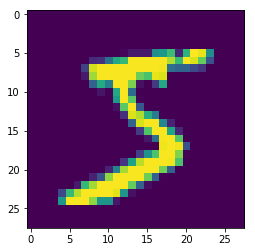

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Changing shape of the image . To keep in a format of gray scale image 
NOTE : if it is RGB Image then we need to change the shape to (num of samples X 28X28X3 )

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Convert the data to float data type

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## One hot encoding 

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Buliding model structure

This code chunk creates sequential model by stacking convolutions to build CNN

Shape of channels in each layer
  
    channel     Kernel           channel
    28X28X1   | 3X3X1X32      -> 26X26X32
    26X26X32  | 3X3X32X64     -> 24X24X64
    24X24X64  | 3X3X64X128    -> 22X22X128
    
    22X22X128 -maxpooling-> 11X11X128
    
    11X11X128 | 3X3X128X256   -> 9X9X256
    9X9X256   | 3X3X256X512   -> 7X7X512
    7X7X512   | 3X3X512X1024  -> 5X5X1024
    5X5X1024  | 3X3X1024X2048 -> 3X3X2048
    3X3X2048  | 3X3X2048X10   -> 1X1X10
    
    
- Input channel dimensions are 28X28X1
    
> accuracy of the model is varying is abnormally from random to 80%

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))# 3X3  Global receptive field
model.add(Convolution2D(64, 3, 3, activation='relu'))# 5X5
model.add(Convolution2D(128, 3, 3, activation='relu'))# 7X7

model.add(MaxPooling2D(pool_size=(2, 2)))# 14X14

model.add(Convolution2D(256, 3, 3, activation='relu'))# 16X16
model.add(Convolution2D(512, 3, 3, activation='relu'))# 18X18
model.add(Convolution2D(1024, 3, 3, activation='relu'))# 20X20
model.add(Convolution2D(2048, 3, 3, activation='relu'))# 22X22
model.add(Convolution2D(10, 3, 3, activation='relu'))  # 24X24  

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()


W0730 18:47:24.573841 140393276036992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0730 18:47:24.601439 140393276036992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 18:47:24.605905 140393276036992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2048, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app


## model.compile()

- It sets loss function 
- It sets optmiser type (with optimser type __we can set learning rate__ too)
- It alse sets metrics type . In this case it is accuracy

It just specifies the network about what to use while converging to optimal weights

Categorical Cross Entropy :

![Categorical cross entropy image](https://latex.codecogs.com/gif.latex?CE&space;=&space;-\sum_{i}^{C}t_{i}&space;log&space;(s_{i}))

- where __Ti__ is ground truth its value will be one only for corresponding category 
- __Si__ is CNN  score for class
- __C__ number of categories


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0730 18:47:25.103065 140393276036992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0730 18:47:25.140968 140393276036992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## model.fit()

- trains the model for a given number of epocs (iterations on entire dataset)
- batch size refers to number of images to consider while each traversal trough image

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1) #1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0730 18:47:25.881978 140393276036992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0730 18:47:25.990747 140393276036992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 224s 4ms/step - loss: 1.6801 - acc: 0.3849
Epoch 2/10
60000/60000 [==============================] - 220s 4ms/step - loss: 1.4219 - acc: 0.4892
Epoch 3/10
60000/60000 [==============================] - 220s 4ms/step - loss: 1.4118 - acc: 0.4916
Epoch 4/10
60000/60000 [==============================] - 220s 4ms/step - loss: 1.4070 - acc: 0.4930
Epoch 5/10
60000/60000 [==============================] - 219s 4ms/step - loss: 1.4042 - acc: 0.4936
Epoch 6/10
60000/60000 [==============================] - 219s 4ms/step - loss: 1.3916 - acc: 0.4942
Epoch 7/10
60000/60000 [==============================] - 219s 4ms/step - loss: 1.1798 - acc: 0.4948
Epoch 8/10
60000/60000 [==============================] - 220s 4ms/step - loss: 1.1728 - acc: 0.4956
Epoch 9/10
60000/60000 [==============================] - 219s 4ms/step - loss: 1.1731 - acc: 0.4958
Epoch 10/10
60000/60000 [==============================] - 219s 4ms/step - loss: 1.1702 - a

## model.evaluate()

- returns loss value and metrics of test data

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score) #Loss value and accuracy of test data

[1.1669568979263305, 0.4989]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.4753901e-09 2.4753901e-09 2.4753901e-09 2.4753901e-09 2.4753901e-09
  2.4753901e-09 2.4753901e-09 1.0000000e+00 2.4753901e-09 2.4753901e-09]
 [3.6983094e-09 3.6983094e-09 1.0000000e+00 3.6983094e-09 3.6983094e-09
  3.6983094e-09 3.6983094e-09 3.6983094e-09 3.6983094e-09 3.6983094e-09]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [9.9999571e-01 4.8176599e-07 4.8176599e-07 4.8176599e-07 4.8176599e-07
  4.8176599e-07 4.8176599e-07 4.8176599e-07 4.8176599e-07 4.8176599e-07]
 [1.1148201e-09 1.1148201e-09 1.1148201e-09 1.1148201e-09 9.9999976e-01
  1.1148201e-09 1.1148201e-09 1.1148201e-09 1.1148201e-09 2.1141754e-07]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [6.2420651e-05 6.2420651e-05 6.2420651e-05 6.2420651e-05 9.9942470e-01
  6.2420651e-05 6.2420651e-05 6.2420651e-05 6.2420651e-05 

## what is wrong with the network !!!
![possibilities](images/whatswrong.png)

    from to the above figure I think there could be two possibilities to the network for not working

**Some observations :**

- Loss is different everytime the model is ran.
  - __Accuracy is varying from random accuracy to 80%__
![single row observation](images/samenumberrow.PNG)
- Some times network is failing to learn. Output is 1 for every output.




- __Decreased total number of parameters this gave an accuracy of 99.56%__. I have used following kernels in each layer
![accuracy](images/good_accuracy.PNG)
Shape of channels and kernels in each layer

      channel     Kernel           channel
      28X28X1   | 3X3X1X32      -> 26X26X32
      26X26X32  | 3X3X32X64     -> 24X24X64
      24X24X64  | 3X3X64X64     -> 22X22X64

      22X22X64 -maxpooling-> 11X11X64

      11X11X64  | 3X3X64X128    -> 9X9X128
      9X9X128   | 3X3X128X128   -> 7X7X128
      7X7X128   | 3X3X128X256   -> 5X5X256
      5X5X256   | 3X3X256X128   -> 3X3X128
      3X3X128   | 3X3X128X10    -> 1X1X10

Total Trainable params : 878,922 

__Possible reasons for abnormal behaviour of network :__

- __Network have more number of parameters than required for a simple MNIST data__. As a result the hyperplane where the model is trying to find the optimal parameters become more complex as shown in below figure.
![regression example](images/parameterfinding.jpg)
- As a result probability of reaching the global optimum or any set of good parameters have reduced.
- (most probably I think)Thats why the accuracy of the network is varying every time.
- It might be because of __abruptly reducing  the number of Channels from 2048 to 10 in final layer__. This could be causing information loss and sometimes not allowing network to learn anything.

__Doubt : Why GRF at final layer is 24 and why not 28. Because final layer convolved to 1X1X10 but how come GRE not 28. If possible please try to write answer in comments :-)__

All experiments i did on the network are present in [this](https://colab.research.google.com/drive/1sbkYMmxz11B9ce6IP3Ey9o8TV81XDvFL) colab file .
  
